In [2]:
import mne
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_csv(r'C:\Users\tomar\Downloads\data\data\MuseData\MU.txt', delimiter='\t', header=None)
df
grouped = df.groupby(3)
tp10 = grouped.get_group('TP10')


In [39]:
tp10

,0,1,2,3,4,5,6
3,978114,132669,MU,TP10,6,459,"470,470,478,489,487,475,469,478,488,483,474,48..."
7,978118,132670,MU,TP10,7,493,"500,506,490,487,492,507,497,493,496,499,495,48..."
11,978122,132671,MU,TP10,6,459,"526,533,531,516,514,532,540,535,519,525,536,53..."
15,978126,132672,MU,TP10,6,459,"517,523,531,533,520,508,516,533,519,509,513,52..."
19,978130,132673,MU,TP10,1,493,"501,504,494,489,485,509,513,487,495,503,503,49..."
...,...,...,...,...,...,...,...
163915,1142026,173647,MU,TP10,-1,460,"549,538,527,537,539,535,534,531,540,544,573,54..."
163919,1142030,173648,MU,TP10,-1,460,"483,487,477,469,486,491,482,476,474,578,482,48..."
163923,1142034,173649,MU,TP10,-1,460,"510,511,515,519,508,513,522,523,532,525,519,51..."
163927,1142038,173650,MU,TP10,-1,460,"537,531,530,531,533,537,537,555,534,522,531,54..."


In [41]:
median_tp10 = tp10[5].median()
print(median_tp10)

460.0


In [51]:
tp10[6] = tp10[6].apply(lambda x: np.array(x.split(','), dtype=float) if isinstance(x, str) else np.array(x, dtype=float))
tp10.loc[:, "7"] = tp10[6].apply(
    lambda x: MinMaxScaler().fit_transform(x.reshape(-1, 1)).flatten()
)


C:\Users\tomar\AppData\Local\Temp\ipykernel_11308\34185619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp10[6] = tp10[6].apply(lambda x: np.array(x.split(','), dtype=float) if isinstance(x, str) else np.array(x, dtype=float))
C:\Users\tomar\AppData\Local\Temp\ipykernel_11308\34185619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp10.loc[:, "7"] = tp10[6].apply(


In [53]:
def interpolate_row(data, new_size):
    old_size = len(data)
    if old_size==new_size:
        return data
    x_old = np.linspace(0,1,old_size)
    x_new = np.linspace(0,1,new_size)
    interpolate = interp1d(x_old,data, kind='linear')
    return interpolate(x_new)

In [61]:
print(tp10.columns.tolist())

[0, 1, 2, 3, 4, 5, 6, '7', '8']


In [62]:
tp10.loc[:, '8'] = tp10['7'].apply(lambda x: interpolate_row(x, int(median_tp10)))
tp10.head()

,0,1,2,3,4,5,6,7,8
3,978114,132669,MU,TP10,6,459,"[470.0, 470.0, 478.0, 489.0, 487.0, 475.0, 469...","[0.12820512820512864, 0.12820512820512864, 0.2...","[0.12820512820512864, 0.12820512820512864, 0.2..."
7,978118,132670,MU,TP10,7,493,"[500.0, 506.0, 490.0, 487.0, 492.0, 507.0, 497...","[0.3283582089552244, 0.41791044776119435, 0.17...","[0.3283582089552244, 0.400741391083797, 0.1726..."
11,978122,132671,MU,TP10,6,459,"[526.0, 533.0, 531.0, 516.0, 514.0, 532.0, 540...","[0.7763157894736841, 0.8684210526315788, 0.842...","[0.7763157894736841, 0.8682203875702326, 0.842..."
15,978126,132672,MU,TP10,6,459,"[517.0, 523.0, 531.0, 533.0, 520.0, 508.0, 516...","[0.48648648648648685, 0.5675675675675675, 0.67...","[0.48648648648648685, 0.5673909203320968, 0.67..."
19,978130,132673,MU,TP10,1,493,"[501.0, 504.0, 494.0, 489.0, 485.0, 509.0, 513...","[0.39999999999999947, 0.4500000000000002, 0.28...","[0.39999999999999947, 0.43801742919389985, 0.2..."


In [ ]:
processed_groups = []

for channel_name, group_df in grouped:
    df = group_df.copy()
    df.columns = df.columns.astype(str)

    df['6'] = df['6'].apply(lambda x: np.array(x.split(','), dtype=float) if isinstance(x, str) else np.array(x, dtype=float))
    median_size = int(df['5'].median())
    df['7'] = df['6'].apply(lambda x: MinMaxScaler().fit_transform(x.reshape(-1, 1)).flatten())

    df['8'] = df['7'].apply(lambda x: interpolate_row(x, median_size))

    processed_groups.append(df)
final_df = pd.concat(processed_groups, ignore_index=True)


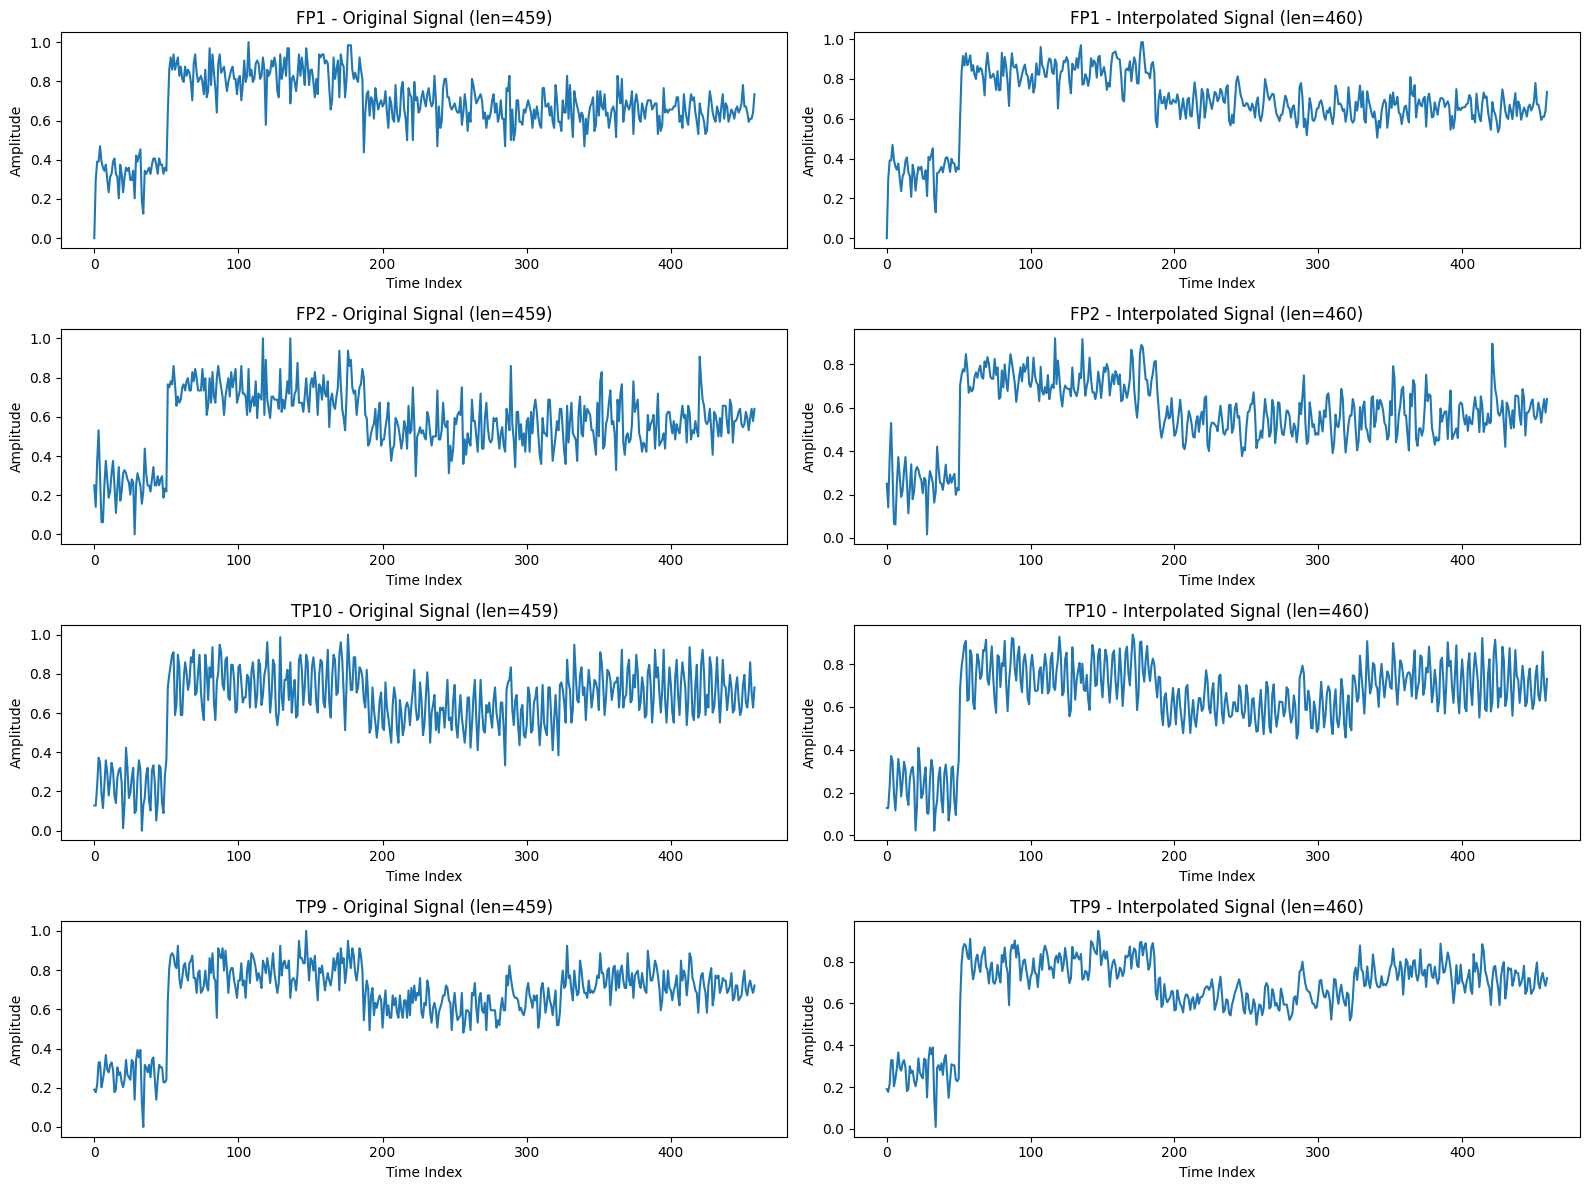

In [ ]:
import matplotlib.pyplot as plt

channels = final_df['3'].unique()

plt.figure(figsize=(16, len(channels) * 3))

for i, ch in enumerate(channels):
    df_ch = final_df[final_df['3'] == ch].iloc[0]
    original = df_ch['7']
    interpolated = df_ch['8']
    
    plt.subplot(len(channels), 2, 2 * i + 1)
    plt.plot(original)
    plt.title(f'{ch} - Original Signal (len={len(original)})')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')
    
    plt.subplot(len(channels), 2, 2 * i + 2)
    plt.plot(interpolated)
    plt.title(f'{ch} - Interpolated Signal (len={len(interpolated)})')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()